In [63]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df=pd.read_csv("/content/matches.csv")

In [64]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [65]:
df.isnull().sum()

,0
id,0
season,0
city,7
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0
dl_applied,0


In [66]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [67]:
from sklearn.preprocessing import normalize
normalized_stats = normalize(df[['win_by_wickets', 'win_by_runs']], norm='l2', axis=0)
normalized_df = pd.DataFrame(normalized_stats, columns=['win_by_runs_normalized', 'win_by_wickets_normalized'])
df = pd.concat([df, normalized_df], axis=1)

In [68]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,win_by_runs_normalized,win_by_wickets_normalized
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,0.000000,0.050411
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,0.057808,0.000000
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,0.082583,0.000000
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,0.049550,0.000000
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,0.000000,0.021605


In [69]:
df.to_csv('/content/matches.csv',index=False)

<ipython-input-70-f7f4a3252767>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_counts.index, y=win_counts.values, palette='viridis')


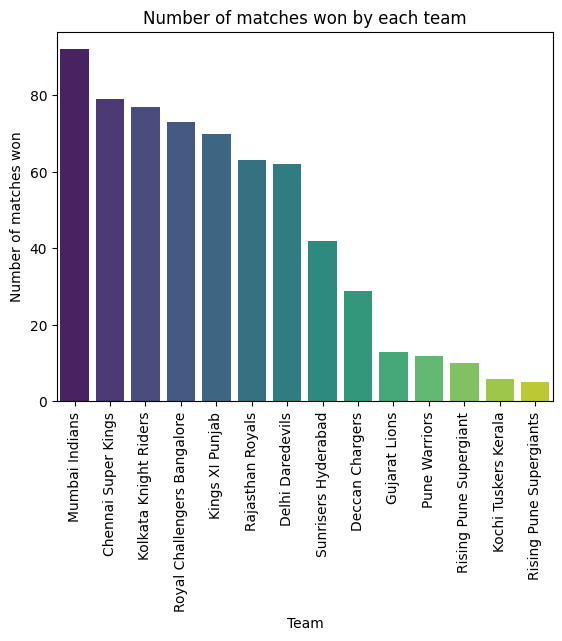

In [70]:
win_counts=df['winner'].value_counts()
sns.barplot(x=win_counts.index, y=win_counts.values, palette='viridis')
plt.title("Number of matches won by each team")
plt.xlabel("Team")
plt.ylabel("Number of matches won")
plt.xticks(rotation=90)
plt.show()

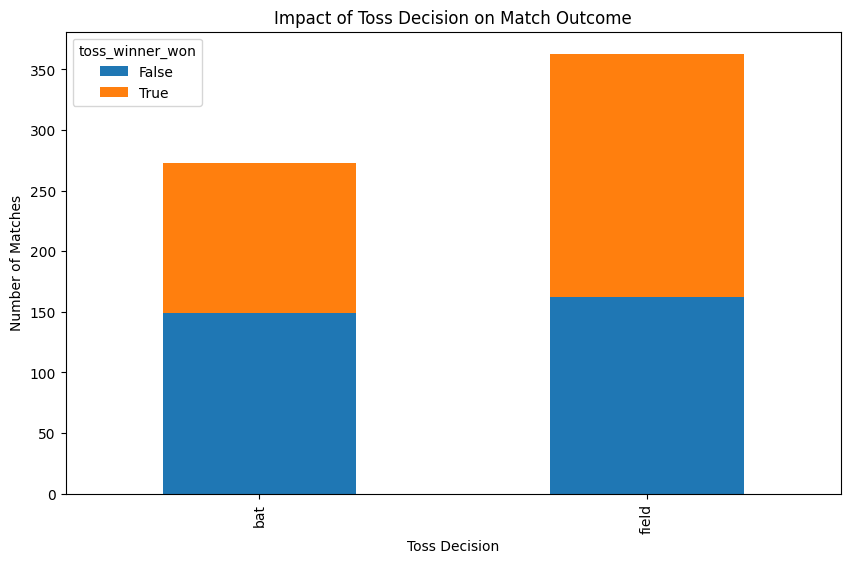

In [71]:
# Create a new column to check if toss winner won the match
df['toss_winner_won'] = df['toss_winner'] == df['winner']

# Group by toss decision and whether the toss winner won
toss_impact = df.groupby(['toss_decision', 'toss_winner_won']).size().unstack()

# Plot
toss_impact.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Impact of Toss Decision on Match Outcome')
plt.xlabel('Toss Decision')
plt.ylabel('Number of Matches')
plt.show()

<ipython-input-72-51f7db076e35>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=award_winners.index, y=award_winners.values, palette='viridis')


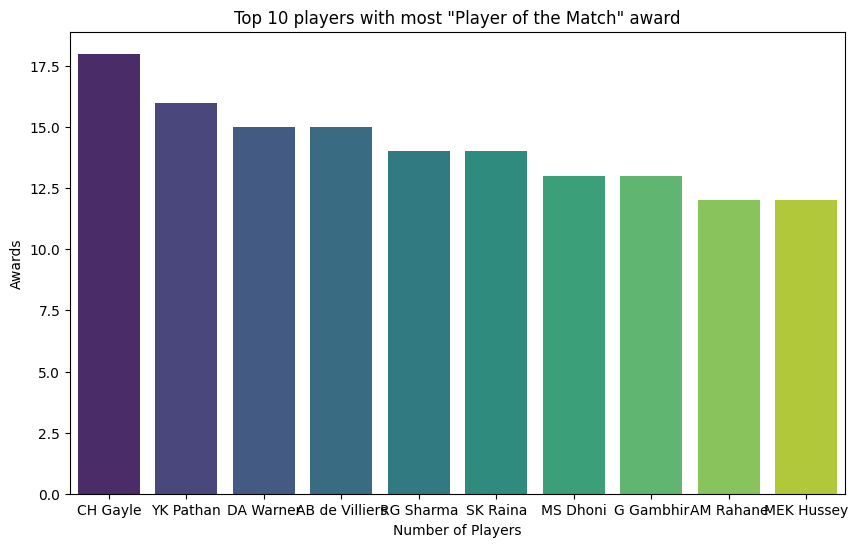

In [72]:
award_winners=df['player_of_match'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=award_winners.index, y=award_winners.values, palette='viridis')
plt.title('Top 10 players with most "Player of the Match" award')
plt.xlabel("Number of Players")
plt.ylabel("Awards")
plt.show()

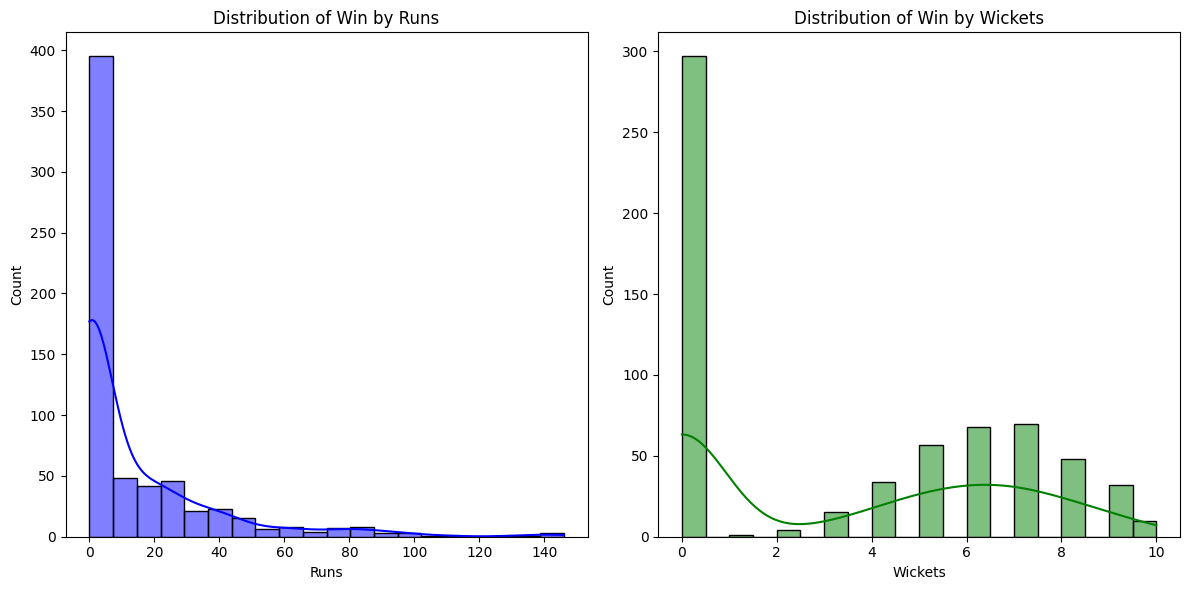

In [73]:
plt.figure(figsize=(12, 6))

# Histogram for win by runs
plt.subplot(1, 2, 1)
sns.histplot(df['win_by_runs'], bins=20, kde=True, color='blue')
plt.title('Distribution of Win by Runs')
plt.xlabel('Runs')

# Histogram for win by wickets
plt.subplot(1, 2, 2)
sns.histplot(df['win_by_wickets'], bins=20, kde=True, color='green')
plt.title('Distribution of Win by Wickets')
plt.xlabel('Wickets')

plt.tight_layout()
plt.show()

<ipython-input-74-28c03a2da644>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=venue_counts.index, y=venue_counts.values, palette='coolwarm')


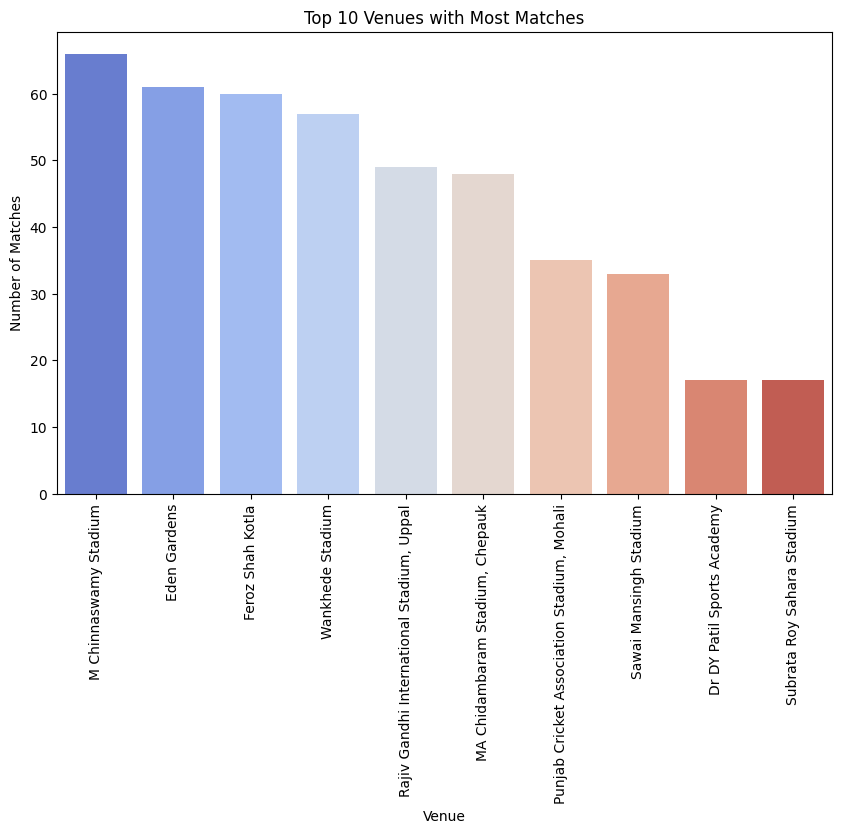

In [74]:
# Count matches per venue
venue_counts = df['venue'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=venue_counts.index, y=venue_counts.values, palette='coolwarm')
plt.title('Top 10 Venues with Most Matches')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()

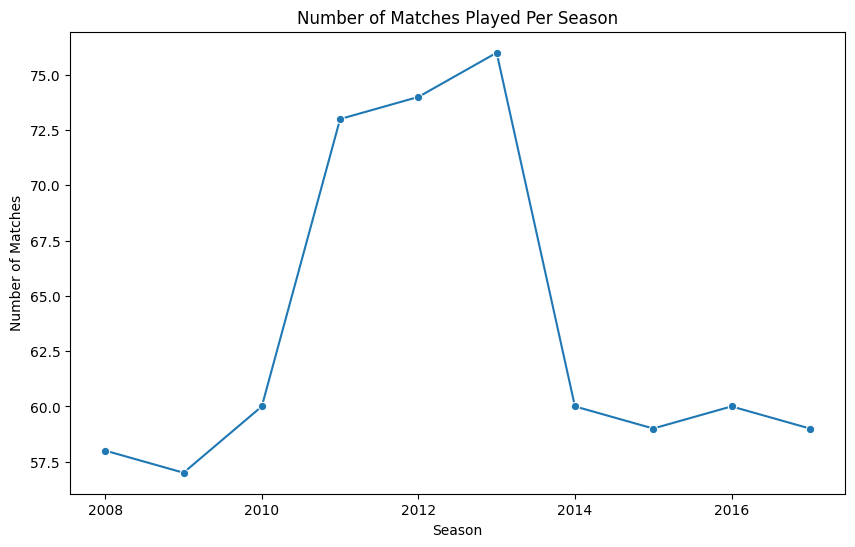

In [75]:
# Count matches per season
season_counts = df['season'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=season_counts.index, y=season_counts.values, marker='o')
plt.title('Number of Matches Played Per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.show()

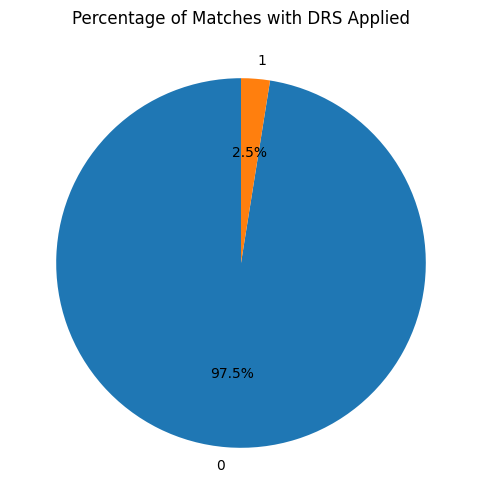

In [76]:
# Count DRS applications
dl_counts = df['dl_applied'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(dl_counts, labels=dl_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Matches with DRS Applied')
plt.show()

<ipython-input-77-54ca69da300b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=umpires.index, y=umpires.values, palette='rocket')


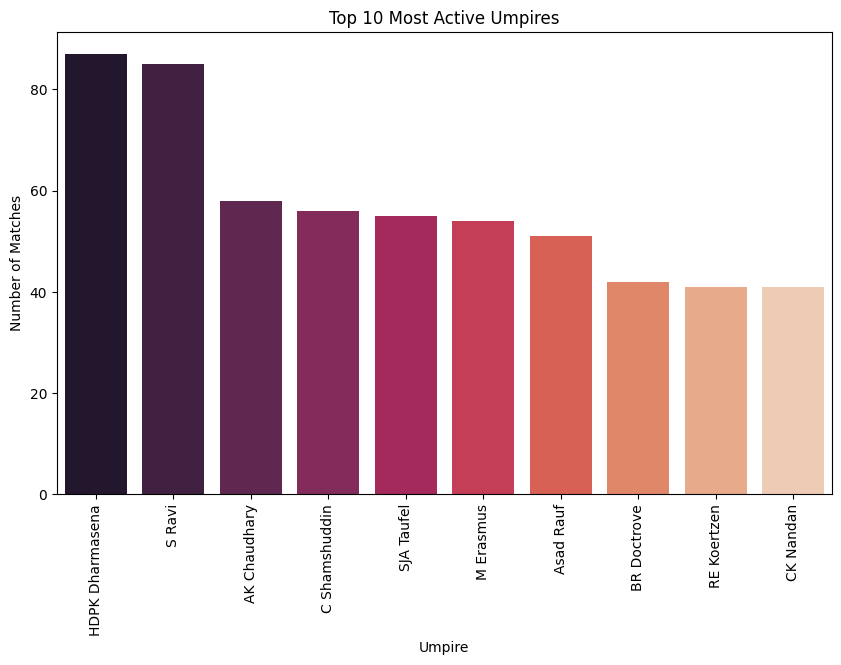

In [77]:
# Combine umpire columns and count
umpires = pd.concat([df['umpire1'], df['umpire2']]).value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=umpires.index, y=umpires.values, palette='rocket')
plt.title('Top 10 Most Active Umpires')
plt.xlabel('Umpire')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()

In [89]:
df_cleaned = df.dropna(subset=['winner'])

In [91]:
df_cleaned.isna().sum()

,0
id,0
season,0
city,7
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0
dl_applied,0


In [92]:
df_cleaned.to_csv("/content/matches.csv")

In [95]:
df_cleaned = df.dropna(subset=['winner']).copy()

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Drop rows with NaN in the 'winner' column and create a copy
df_cleaned = df.dropna(subset=['winner']).copy()

# Feature engineering
df_cleaned['toss_winner_won'] = (df_cleaned['toss_winner'] == df_cleaned['winner']).astype(int)

# Define features and target
features = ['team1', 'team2', 'toss_winner', 'toss_decision', 'venue']
X = pd.get_dummies(df_cleaned[features])  # One-hot encoding for categorical variables
y = df_cleaned['winner']

# Verify that X and y have the same number of rows
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Shape of X: (633, 79)
Shape of y: (633,)
Accuracy: 0.5511811023622047


In [98]:
# Feature engineering
df['toss_winner_won'] = (df['toss_winner'] == df['winner']).astype(int)
features = ['toss_decision', 'venue', 'team1', 'team2']
X = pd.get_dummies(df[features])
y = df['toss_winner_won']

# Train-test split and model training (similar to above)